In [3]:
import gzip
import json
from datetime import datetime

import IPython
import jsonlines
import pandas as pd

with jsonlines.Reader(gzip.open('../data/politicians_tweetdata_long.jsonl.gz')) as reader:
    raw_politician_tweets = list(reader)


def parse_twitter_datetime(dt: str):
    return datetime.strptime(dt, '%a %b %d %H:%M:%S +0000 %Y')


tweet_df = pd.DataFrame(data={
    'tweet': [t['full_text'] for t in raw_politician_tweets],
    'author': [t['user']['screen_name'] for t in raw_politician_tweets],
    'date': [parse_twitter_datetime(t['created_at']) for t in raw_politician_tweets],
    'id': [t['id'] for t in raw_politician_tweets]
})
tweet_df

,tweet,author,date,id
0,"Madame Vice President, Americans are watching....",MarshaBlackburn,2021-04-22 23:57:20,1385382242751500293
1,"RT @thehill: Sen. @MarshaBlackburn: ""Can you e...",MarshaBlackburn,2021-04-22 23:49:43,1385380324495044613
2,RT @SaraCarterDC: Marsha Blackburn: We need re...,MarshaBlackburn,2021-04-22 23:08:39,1385369992238092288
3,Mainstream media is falling in line with the D...,MarshaBlackburn,2021-04-22 20:43:49,1385333542041784322
4,Democrats want to pack the Supreme Court so th...,MarshaBlackburn,2021-04-22 17:03:59,1385278218186498048
...,...,...,...,...
192759,No authorization for war with Iran:\n• 2001 AU...,justinamash,2020-01-03 16:52:53,1213141191845388288
192760,There’s a reason our Constitution grants Congr...,justinamash,2020-01-03 03:40:45,1212941844558032898
192761,Happy New Year!\n\nMay 2020 be a year of peace...,justinamash,2020-01-01 05:00:00,1212237013040140289
192762,One of the best decisions I made in 2019 was l...,justinamash,2020-01-01 00:25:12,1212167856831508484


Downsample the rows because otherwise there is way too much data

In [4]:
tweet_df = tweet_df.sample(50000, random_state=0)
tweet_df

,tweet,author,date,id
76588,"It's hard to believe this has to be said, but ...",JoeBiden,2020-06-04 22:00:00,1268663821998206978
61636,@BernieSanders I understand your support for t...,JoinRocky,2020-01-22 19:27:30,1220065470646108162
53157,I am about to testify before @RulesDemocrats i...,LeaderHoyer,2020-05-14 15:19:19,1260952839851048962
84794,It is my pleasure to join you this Wed Jul 1. ...,DonBeyerVA,2020-06-29 20:10:46,1277696029291405322
102510,MAKE MICHIGAN AND AMERICA GREAT AGAIN! 🇺🇸 http...,Mike_Pence,2020-11-03 07:08:30,1323522425204563969
...,...,...,...,...
135217,The coronavirus (COVID-19) public health emerg...,gracenapolitano,2020-03-25 01:07:31,1242619085680230400
96173,We all have to take steps to make sure that we...,michaelcburgess,2021-01-28 22:37:00,1354921444392710149
25149,"Dems want you to have the 2k, the House GOP do...",RepSchakowsky,2020-12-24 21:41:05,1342223796649005063
64489,(2/2) Durante casi cuatro años he trabajado si...,MarioDB,2021-04-20 18:34:42,1384576271913467911


In [5]:
with open('../data/politicians.json') as file:
    raw_politicians = json.load(file)

politician_handles = [
    {
        'handle': handle['handle'],
        'handle_type': handle['name'],
        'name': p['name'],
        'party': p['party'],
        'lgbt_stance': p['vote_match'][2]
    }
    for p in raw_politicians for handle in p['twitters']
]

politician_df = pd.DataFrame.from_dict(politician_handles)
politician_df = politician_df[politician_df['handle_type'] != 'Don Beyer Twitter feed']
politician_df

,handle,handle_type,name,party,lgbt_stance
0,MarshaBlackburn,Official Twitter,Marsha Blackburn,Republican,0
1,pattymurray,Official Twitter,Patty Murray,Democratic,4
3,PeteSessions,Official Twitter,Pete Sessions,Republican,0
4,SessionsTX17,Campaign Twitter,Pete Sessions,Republican,0
5,KamalaHarris,Campaign Twitter,Kamala Harris,Democratic,4
...,...,...,...,...,...
198,wydenfororegon,Campaign Twitter,Ron Wyden,Democratic,4
199,joesestak,Campaign Twitter,Joe Sestak,Democratic,4
200,amashoffice,Official Twitter,Justin Amash,Libertarian,0
201,teamamash,Campaign Twitter,Justin Amash,Libertarian,0


In [6]:
tweet_df = tweet_df.merge(politician_df, left_on='author', right_on='handle')

In [7]:
import nltk
from nltk import TweetTokenizer

tokenizer = TweetTokenizer(preserve_case=False, reduce_len=True)


def preprocess(sent):
    sent = tokenizer.tokenize(sent)
    sent = nltk.pos_tag(sent)
    return sent


tweet = tweet_df['tweet'].iloc[32]

preprocess(tweet)

[('i', 'NN'),
 ('’', 'VBP'),
 ('m', 'NN'),
 ('running', 'VBG'),
 ('as', 'IN'),
 ('a', 'DT'),
 ('proud', 'JJ'),
 ('democrat', 'NN'),
 ('.', '.'),
 ('but', 'CC'),
 ('i', 'VBP'),
 ('will', 'MD'),
 ('govern', 'VB'),
 ('as', 'IN'),
 ('an', 'DT'),
 ('american', 'JJ'),
 ('president', 'NN'),
 ('.', '.'),
 ('https://t.co/UgNPbQdNZH', 'NN')]

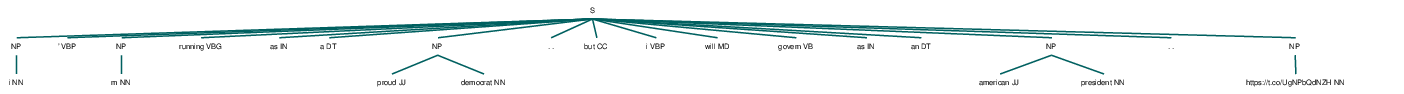

In [8]:
pattern = 'NP: {<JJ>*<NN>}'
cp = nltk.RegexpParser(pattern)
cs = cp.parse(preprocess(tweet))



from nltk.tree import Tree
import IPython
from IPython.display import display

tree = Tree.fromstring('(S (NP this tree) (VP (V is) (AdjP pretty)))')
IPython.core.display.display(cs)